# TDT4215 Group Project: Recommender System for News Recommendation

This notebook provides group project details for course TDT4215 Recommender Systems. It also contains information about the dataset students are expected to use, and runs some example code to demonstrate how a basic recommender system might look like. The notebook is intended as a living document during the duration of the semester to accommodate any changes or clarifications. All updates will be listed at the end, along with the date, in the effort to keep all relevant information in one place and avoid confusion.

The original authors of the project are Lemei Zhang and Peng Liu, who are reachable via their NTNU email addresses, though they are not active course staff, so you probably shouldn't bother them 🙂

## 1. General requirements and learning outcomes

The goal of the student project is to apply the theoretical knowledge gained from lectures to solve a practical problem of building a recommender system for a newspaper website. Online news is one of the most important and popular ways for people to get informed every day. The task in this project is to filter the most useful and relevant news for a specific user. Students are expected to approach solving this problem through team work, experimentation, and analytical thinking within a limited time, adhering to a schedule outlined in a later section.

The development of a recommender system must be done in groups of 2 to 4 students. Each student group will use the same dataset, collected from Adresseavisen portal, described in more detail below. Each group is free to choose their own tools and develop their own methods in order to get the best results. The only constraint is using the Adressa dataset.

## 2. Important dates

| Date | Description |
| :------| :-----------|
| **January 24th** | Group project kick-off and start of group registrations |
| **February 8th** | Group formation deadline |
| **April 15th** | Report submission deadline |
| **April 22nd** | Project presentations |

The course staff is currently considering organization of mid-term project presentation to check on the groups' progress. You will be notified if we make such a decision.

## 3. Deliverables and evaluation

The group work will be evaluated based on two deliverables: the project report and the project presentation. Both are equally important. The project itself will not be graded. It is only possible to pass or fail. Passing the group project is necessary for taking the exam.

### 3.1 Report

Your report should include the following:
- Motivation for your project topic
- A ***brief*** overview of existing news recommender algorithms and approaches (you don't have to research state-of-the-art, just provide the background relevant for the approaches you utilized, and how they fit into the theoretical concepts from the lectures).
- At least two *reasonably different* recommendation approaches, one of which can be categorized as collaborative filtering. All recommendations have to be **personalized**, but they can include non-personalized considerations as well.
- Explain the derived recommender models and the architecture of the implemented recommender system.
- The evaluation results with multiple (at least two) *reasonably different* performance indicators. See below for some evaluation metrics you may choose to use.
- Visualizations to help convey your main points where appropriate.
- Discussion of your obtained results.
- Conclusion and any additional remarks related to your project that you find interesting.

Your report has to be submitted with the *runnable* implementation of your system. This means that we can easily run your submitted code as long as we add the Adressa dataset (you don't have to submit the datasets we provide here). If we try to run it and can't, we will ask you for clarification via email. If we still can't run it after your clarification, you will fail the project. Please make sure that you don't submit buggy code.

The results have to be *reproducible*, meaning that we can obtain the similar, not necessarily identical, results by running your code to the ones reported. There is no reason to not report the results you obtain with your implementation, since there are no minimum requirements for the evaluation indicators.

The implementation can be in any programming language you choose. If the course staff has any issues with understanding your implementation, we will ask you for clarification with same conditions as above. For everyone's sake, try to keep your code readable.

Make sure to include all your decisions in the report. Why you chose to go for a particular method or evaluation indicator over others, etc. The report should not exceed 15 pages with all appendices, tables, and visualizations. You can find some example reports on Blackboard. They are not a template (in part because they don't conform to the page limit), only some help to get you started.

### 3.2 Presentation

The project presentation will be the opportunity for the student groups to show their understanding of their implemented approaches and design choices. On the other hand, it will be opportunity for the course staff to make sure all the group members are familiar with the ideas necessary for project completion. Presentation should take between 10 to 15 minutes for each group. After each presentations, course staff will ask some questions for around 5 to 10 minutes. All group members are expected to attend and participate in the question answering part. You don't need to have an answer for each question, but you *should* be able to understand what you're being asked.

In case of a large number of student groups, we might extend project presentations to additional date.

## 4. Adressa dataset

The project dataset is a refined version of the Adressa dataset published by the SmartMedia group at NTNU in partnership with the local newspaper Adresseavisen in Trondheim. This dataset includes anonymized user data from local digital newspaper from 01.01.2017 to 31. 03. 2017 (3 months in total). We filter 1000 most active users from the original dataset, and select 9 attributes that we think most relevant for the project. The dataset is around 85Mb in a compressed size. Due to licensing reasons, we can't include the archive in this repository. You can download it from Blackboard's course page. In case you want to know more than is available here, the information about the original dataset and its documentation are available on http://reclab.idi.ntnu.no/dataset.

In case you want to work with article contents, and not just clickstream logs available in the data described in this section, full articles (in Norwegian) from the newspaper are also available. Unfortunately, due to licensing, they have to be requested on individual basis by student groups. To get article contents, it's enough for one group member to request them by emailing the responsible TA (Mateja).

### 4.1 Overview

The data in the refined dataset consists of clicking events (clickstream) in JSON format, organized by dates.

In [2]:
import os

DATA_FOLDER = 'active1000'
files = os.listdir(DATA_FOLDER)
print(files)

['20170321', '20170113', '20170114', '20170326', '20170319', '20170122', '20170310', '20170317', '20170125', '20170328', '20170124', '20170316', '20170329', '20170311', '20170123', '20170327', '20170115', '20170318', '20170112', '20170320', '20170208', '20170201', '20170206', '20170207', '20170209', '20170213', '20170214', '20170222', '20170225', '20170224', '20170223', '20170215', '20170212', '20170302', '20170130', '20170108', '20170305', '20170101', '20170106', '20170107', '20170109', '20170304', '20170131', '20170303', '20170325', '20170117', '20170128', '20170110', '20170322', '20170126', '20170314', '20170119', '20170313', '20170121', '20170120', '20170312', '20170315', '20170127', '20170118', '20170323', '20170111', '20170116', '20170324', '20170129', '20170205', '20170202', '20170203', '20170204', '20170228', '20170217', '20170210', '20170219', '20170226', '20170221', '20170220', '20170218', '20170227', '20170211', '20170216', '20170306', '20170301', '20170308', '20170105', '20

In Python, you can use *json* package to read these events. Let's take a closer look at a single click event.

In [3]:
import json

ARBITRARY_INDEX = 5
filepath = os.path.join(DATA_FOLDER, files[ARBITRARY_INDEX])

# one way to load all events into memory
events = []
for line in open(filepath):
    events.append(json.loads(line.strip()))

print(json.dumps(events[ARBITRARY_INDEX], indent=4))

{
    "eventId": 304742641,
    "category": null,
    "activeTime": 18,
    "title": "Bil kj\u00f8rte av veien i Trondheim",
    "url": "http://adressa.no/nyheter/trondheim/2017/01/21/bil-har-kj%c3%b8rt-av-veien-i-trondheim-14096618.ece",
    "userId": "cx:172hiwprmaxp6t900xbxm2tin:35r8k9abzv9u5",
    "publishtime": null,
    "time": 1485039620,
    "documentId": "1b00089faaa14baf2765794f567a9b83dc2d1a93"
}


We can see there are 9 attributes in one event: *activeTime*, *category*, *documentId*, *eventId*, *publishtime*, *time*, *title*, *url*, and *userId*. Note that not all attributes have values. If some attributes have no value, there will be a None type instead, denoted above by *null* value.

### 4.2 Basic statistics

Let's look at some basic statistics of the data.

In [8]:
import project_example as pe

df=pe.load_data("active1000")
print("\nBasic statistics of the dataset...")
pe.statistics(df)


Basic statistics of the dataset...
Total number of events (front page incl.): 2207608
Total number of events (without front page): 788931
Total number of documents: 20344
Sparsity: 3.878%
Total number of events (drop duplicates): 679355
Sparsity (drop duplicates): 3.339%

Describe by user:
            counts
count  1000.000000
mean    679.355000
std     333.619737
min      59.000000
25%     506.750000
50%     639.500000
75%     797.500000
max    7958.000000


In the output above, events are user clicks, and documents are news articles.

"Front page event" is user opening a [front page](https://www.adressa.no/) of the newspaper.

Duplicates are repeated user-document pairs, which occur for example when user refreshes an article. The lower statistics block is with duplicates dropped. So for example, by slightly changing the underlying example code, you can easily see that the maximum events per user without dropping duplicates is 7960, while minimum is 181, and average number of events per user is 788.931 (up from 679.355).

Sparsity being 3.878% means that out of all possible user-ratings for each published article, 3.878% have a value. Note that, although we fill the missing values with 0, we should not assume that these values are truly zero.

## 5. Example recommenders

In the scripts located in the same repository as this notebook, we offer two recommendation examples. By themselves, these wouldn't be enough for passing the project, since they don't satisfy the requirements above. You are encouraged to come up with your own approaches. If you, however, decide to use the example code as your foundation, be aware that you will have to make sufficient improvements in the design of both systems in order to pass, aside from satisfying the missing requirements.

### 5.1 Collaborative filtering

Collaborative Filtering (CF) is a widely adopted category of recommendation algorithms. The fundamental assumption of CF is that if user X and Y rate n items similarly, or have similar behaviours (such as buying, rating, clicking, listening), and hence will rate or act on other items similarly.

There are many kinds of CF and CF extended algorithms online nowadays. In this notebook, we introduce the Explicit Matrix Factorization (MF) as an example. MF is based on the assumptions of:
1. each user can be described by k features;
2. each item can be described by k attributes;
3. predicted value of rating or clicking probability of an item can be represented by the summation of each multiplication of user feature value and item feature value.

We will not elaborate MF here. Students can look up their own sources for Explicit Matrix Factorization, such as this one [here](https://www.ethanrosenthal.com/2016/01/09/explicit-matrix-factorization-sgd-als/), on which our code implementation of MF is based upon. Difference is that we assume the ratings of clicked items are 1, and otherwise 0 in user-item matrix.

Before MF, we split our data into training and test sets by randomly choosing a fraction of ratings per user from the whole dataset in *function train_test_split(ratings, fraction)*. Think about the validity of this decision.

The evaluation of MF is according to MSE, which is explained later on. The output results of each iteration are shown below.


Recommendation based on MF...
Iteration: 1
Train mse: 0.6059204165637324
Test mse: 0.6940896692800553
Iteration: 2
Train mse: 0.5368904132655493
Test mse: 0.6460228409266665
Iteration: 5
Train mse: 0.5132741564991246
Test mse: 0.6288917374580757
Iteration: 10
Train mse: 0.5101313719020842
Test mse: 0.6257605940251577
Iteration: 25
Current iteration: 10
Train mse: 0.5091803187580235
Test mse: 0.6244963633503073
Iteration: 50
Current iteration: 10
Current iteration: 20
Train mse: 0.508969614777235
Test mse: 0.624262495118626
Iteration: 100
Current iteration: 10
Current iteration: 20
Current iteration: 30
Current iteration: 40
Current iteration: 50
Train mse: 0.5089732037941833
Test mse: 0.6241971502753075


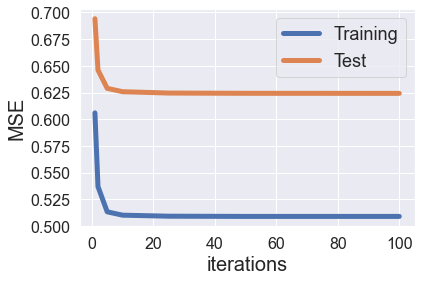

In [9]:
print("\nRecommendation based on MF...")
pe.collaborative_filtering(df)

### 5.2 Content-based filtering

Content-based recommendations are another popular used recommendation methods. They make recommendations by analysing the content of textual information and finding regularities in the content.
In this example, we adopt TF-IDF (Term Frequency – Inverse Document Frequency) for feature selection and Cosine similarity to find the most similar items with user clicking before.

TF-IDF can be implemented with help of *scikit-learn*, a useful Python package for machine learning tasks. Specifically, *TfidfVectorizer* converts a collection of raw documents to a matrix of TF-IDF features. We then use cosine similarity to measure the similarity of two items.

The recommendation results can be a ranked list of all candidate items according to the cosine similarities with the last clicking item. The evaluation is according to *Recall@k* and *ARHR@k*. The detailed definition of Recall and ARHR is also provided in the next section. In the output that follows, we calculate these metrics for recommendation lists of k=20 articles.

In [10]:
print("\nRecommendation based on content-based method...")
pe.content_recommendation(df, k=20)


Recommendation based on content-based method...
Dimension of feature vector: (20393, 169)
Similarity Matrix:
[[1.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         1.         0.14058365]
 [0.         0.         0.14058365 1.        ]]
                                           userId        time  tid  \
0     cx:10k2wzm1b3jsk2y5ym1utnjo97:2kefzqaxe9jx7  1483293374    1   
194   cx:10k2wzm1b3jsk2y5ym1utnjo97:2kefzqaxe9jx7  1483293397    2   
220   cx:10k2wzm1b3jsk2y5ym1utnjo97:2kefzqaxe9jx7  1483293408    3   
366   cx:10k2wzm1b3jsk2y5ym1utnjo97:2kefzqaxe9jx7  1483293422    4   
514   cx:10k2wzm1b3jsk2y5ym1utnjo97:2kefzqaxe9jx7  1483293441    5   
822   cx:10k2wzm1b3jsk2y5ym1utnjo97:2kefzqaxe9jx7  1483293500    6   
1033  cx:10k2wzm1b3jsk2y5ym1utnjo97:2kefzqaxe9jx7  1483303959    7   
1136  cx:10k2wzm1b3jsk2y5ym1utnjo97:2kefzqaxe9jx7  1483303964    8   
1349  cx:10k2wzm1b3jsk2y5ym1utnjo97:2kefzqaxe9jx7  1483304044    9   
1

## 6. Evaluation metrics

Evaluation of recommendation system performance is never an easy task. Your job is somewhat simplified by the nature of data you are provided with. In this section we list some of the most commonly used metrics for offline evaluation: recall, CTR, ARHR, and MSE.

### 6.1 Recall (Hit Rate)

Recall is used to measure the fraction of positive instances that are correctly predicted, which can be defined as:

$$
  Recall = \frac{tp}{tp+fn}
$$

where:
- $tp$ stands for true positive - the number of positive instances that are correctly predicted, and
- $fn$ is false negative - the number of mispredicted negative instances.

Also of interest are:
- true negative $tn$, the number of negative instances that are correctly predicted, and
- false positive $fp$, the number of mispredicted positive instances.

### 6.2 CTR (Click Through Rate)

Click through rate is the number of recommendations produced by a participating system that are clicked by users normalised by the total number of requests for recommendations that were sent to that
system.

**Example**: Participant "rocking recommendations" receives 100,000 recommendation requests. The system manages to provide valid, in-time suggestions in 95,000 cases. Users click on 4,500 suggestions.

We compute a CTR of 4,500 / 100,000 = 4.5%.

### 6.3 ARHR

The third measure that is commonly used, is the average reciprocal hit rate (ARHR). This measure is designed for implicit feedback data sets, in which each value of $r_{uj} \in \{0,1\}$. Therefore, a value of $r_{uj}=1$ represents a "hit" where a customer has bought or clicked on an item, and value $r_{uj}=0$ corresponds to a situation where a customer has not bought or clicked on an item. In this implicit feedback setting, missing values in the ratings matrix are assumed to be 0. Then, the ARHR metric for the user $u$ is defined as:

$$
  ARHR(u) = \sum_{j \in I_u} \frac{r_{uj}}{v_j}
$$

where:
- $v$ is the rank of item $j$ in the recommended list, and
- $I_u$ represents the set of items rated by user $u$.

### 6.4 MSE

Mean Squared Error (MSE) is a widely used predictive accuracy metric. It takes the sum of the squared difference between the user's rating/score and the predicted rating/score and divides it by the number of items considered.

$$
  MSE = \frac{1}{|I|} \sum_{b \in I_u} (r(b) - \hat{r}(b))^2
$$

where:
- $I$ represents the items in the test dataset,
- $r$ represents the observed value, and
- $\hat{r}$ represents the predicted value.

## 7. Links that you may find useful

- LensKit library: https://lenskit.org/
- Machine Learning in Python - scikit-learn: http://scikit-learn.org/stable/
- Natural Language Toolkit: http://www.nltk.org/
- Numpy – Scientific computing with Python: http://www.numpy.org/
- Pandas – Python Data Analysis Library: https://pandas.pydata.org

Also feel free to look for inspiration either in the textbooks we use (like [one by C. Aggarwal](https://link.springer.com/book/10.1007/978-3-319-29659-3) or [RS Handbook](https://link.springer.com/book/10.1007/978-1-4899-7637-6)), more hands-on sources (like [*Practical RS*](https://www.manning.com/books/practical-recommender-systems)), or online. In any case, make sure to cite your sources.

## 8. Group formation

As stated previously, project will be done in groups of 2 to 4 students. You should try to form groups by yourselves. If you can't, send an email to Mateja before the deadline, and you'll be assigned to one.

When you have formed a group, enter your names in the Google sheet linked on the Blackboard, in 'Group project' section. You will be contacted after the group formation deadline to confirm your formation and contact via your NTNU email address. If you would rather be contacted with other email address, send an email to Mateja or just put that other address in the spreadsheet.

The deadline for the group formation is extended to the **9th of February, end of day (23:59)**.

## 9. Help with the project

The Q&A sessions will be held every other Monday at 10:00 in room R3, according to the course calendar on Blackboard. Obviously, this is subject to change at any moment depending on the spread of the infection.

Outside the Q&A sessions, you can email Mateja about any questions you might have related to the project.

## 10. Version history

**24th January** - Initial version

**8th February** - Updated information about the extended deadline for project groups